## Introduction

This project stemmed from my prior research on Lagos rental costs. Recognizing the availability of data, I decided to extend my analysis to encompass property selling prices, both for houses and land, across various Lagos neighborhoods.

The project outcome holds significant value for individuals considering real estate investments within the state. However, it's important to note that while our aim is to provide an accurate representation of typical property prices, our data is from 2022. Economic variables such as inflation may have led to price fluctuations since that time.

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
sale = pd.read_csv('sale_2.csv')

## Exploring dataset

In [2]:
print(sale.info())
print(sale.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     9784 non-null   int64 
 1   Price          9784 non-null   int64 
 2   Pid            9784 non-null   object
 3   Property_name  9784 non-null   object
 4   Address        9784 non-null   object
 5   Neighboorhood  9784 non-null   object
dtypes: int64(2), object(4)
memory usage: 458.8+ KB
None
        Unnamed: 0         Price
count  9784.000000  9.784000e+03
mean   4891.500000  6.460669e+08
std    2824.541851  2.254820e+10
min       0.000000  1.000000e+03
25%    2445.750000  1.500000e+07
50%    4891.500000  4.800000e+07
75%    7337.250000  1.200000e+08
max    9783.000000  1.600000e+12


## The dataset contains a null column named unnamed
We would drop the columns that are not needed for the analysis and standardize the remaining columns by removing any leading or trailing spaces.

In [3]:
sale = sale.drop(['Unnamed: 0', 'Pid'], axis=1)
sale.columns = sale.columns.str.lower().str.strip()

## Extracting the property type into property column
Regular expression techniques will be used to extract the category of property that the property falls under e.g self-contain, 2 bedroom etc. 

In [4]:
sale['property'] = sale['property_name'].str.extract(r'(self-? ?contain|\d+ bedroom flat|\d+ bedroom duplex|\d+ bedroom bungalow|\d+ bedroom house|\d+ bedroom bungalow|\d+ bedroom commercial|\d+ bedroom mini flat|Office space|shop|Land)', flags=re.I)
sale['property'].value_counts(dropna=False)
#sale[sale['property'].isna()]

Land                     4034
4 bedroom Duplex         1159
5 bedroom Duplex         1157
3 bedroom Flat            811
NaN                       421
4 bedroom House           318
3 bedroom Duplex          233
2 bedroom Flat            232
3 bedroom Bungalow        199
6 bedroom Duplex          152
5 bedroom House           151
4 bedroom Flat            125
4 bedroom Bungalow         84
1 bedroom mini flat        75
3 bedroom House            67
7 bedroom Duplex           53
2 bedroom Bungalow         52
10 bedroom Commercial      51
Office Space               44
5 bedroom Flat             35
10 bedroom Flat            31
10 bedroom Duplex          30
land                       29
5 bedroom Bungalow         22
Shop                       20
6 bedroom Bungalow         18
2 bedroom Duplex           18
6 bedroom House            17
10 bedroom House           15
8 bedroom Duplex           15
6 bedroom Flat             14
2 bedroom House            14
3 bedroom Commercial        9
8 bedroom 

## Dropping Null rows
These rows do not contain enough information to conduct an analysis on the properties e.g how many bedrooms the properties have and since they constitute a small proportion of the dataset it is safe to remove them.

In [24]:
#summing the total null row in each column
print(sale.isna().sum())
#dropping the null rows in the null column
sale.dropna(subset='property', inplace=True)
#confirming that all null rows have been dropped
sale.isna().sum()

price               0
property_name       0
address             0
neighborhood        0
property            0
sqm              7287
dtype: int64


price               0
property_name       0
address             0
neighborhood        0
property            0
sqm              7287
dtype: int64

## Extracting number of square meter from properties that are land
Regular expression techniques will be used to achieve this. It will be used later in the analysis to categorize the property by size and help get insight in that area.

In [6]:
sale[sale['property'] == 'Land']
sale['sqm'] = sale['property_name'].str.extract(r'(\d+\.\d+ ?sqms?|\d+\.\d+ ?square ?met[er][er]s?)', flags=re.I)
sale['sqm'] = sale['sqm'].str.replace('square meter', '').fillna('0.0').astype(float).astype(int)
sale['sqm'] = sale['sqm'].replace(0, np.nan)
#sale_new = sale[sale['sqm'] < 1000]
sale[sale['property'] == 'Land']
sale['sqm'].value_counts(dropna=False).head(40)
#sale[sale['sqm'] > 1000]
sale

,price,property_name,address,neighboorhood,property,sqm
0,2500000,Land for sale Eleranigbe Eleranigbe Ibeju-Lekk...,Eleranigbe Eleranigbe Eleranigbe Ibeju-Lekki L...,Ibeju-Lekki,Land,NaN
1,30000000,667.0 square meter Land for sale opebi street ...,Opebi street opebi street Opebi Ikeja Lagos,Ikeja,Land,667.0
2,3500000000,3 bedroom House for sale Victoria Island Exten...,VI Lagos VI Extension VI Lagos,VI,3 bedroom House,NaN
3,340000000,5 bedroom Duplex for sale Lekki Phase 1 Lekki ...,off afrika lane Lekki Phase 1 Lekki Lagos,Lekki,5 bedroom Duplex,NaN
4,28000000,3 bedroom Flat / Apartment for sale Igando Iko...,NEAR IGANDO B/STOP Igando Ikotun Igando Lagos,Igando,3 bedroom Flat,NaN
...,...,...,...,...,...,...
9779,50000000,5 bedroom Duplex for sale Magodo Isheri Ojodu ...,"gateway zone, magodo Magodo Isheri Ojodu Lagos",Ojo,5 bedroom Duplex,NaN
9780,45000000,4 bedroom Duplex for sale Bakare Estate Agungi...,Sassi street Bakare Estate Agungi Lekki Lagos,Lekki,4 bedroom Duplex,NaN
9781,30000000,5 bedroom Duplex for sale Ejigbo Ejigbo Lagos,idimu road Ejigbo Ejigbo Lagos,Ejigbo,5 bedroom Duplex,NaN
9782,450000000,1127.0 square meter Land for sale Adeola Odeku...,Idejo Street Adeola Odeku VI Lagos,VI,Land,1127.0


## Checking the unique neighborhoods
This helps us have an understanding of the neighborhoods that we will be conducting analysis with and make any necessary decisions on it.

In [7]:
#correcting the spelling of the neighborhood column
sale.rename(columns={'neighboorhood': 'neighborhood'}, inplace=True)
#displaying the unique columns
pd.Series(sale['neighborhood'].unique())

## Categorizing each property type
We will classify the different property type so that analysis can be perforrmed on them later to understand the variation in prices for different property size in each neighborhood.

In [8]:
two_bedroom = sale[sale['property'].str.contains('2 bedroom', case=False)]
two_bedroom = two_bedroom[two_bedroom['property'] != '2 bedroom Commercial']
three_bedroom = sale[sale['property'].str.contains('3 bedroom', case=False)]
three_bedroom = three_bedroom[three_bedroom['property'] != '3 bedroom Commercial']
four_bedroom = sale[sale['property'].str.contains('4 bedroom', case=False)]
four_bedroom = four_bedroom[four_bedroom['property'] != '4 bedroom Commercial']
five_bedroom = sale[sale['property'].str.contains('5 bedroom', case=False)]
five_bedroom = five_bedroom[five_bedroom['property'] != '5 bedroom Commercial']
six_bedroom = sale[sale['property'].str.contains('6 bedroom', case=False)]
six_bedroom = six_bedroom[six_bedroom['property'] != '6 bedroom Commercial']
seven_bedroom = sale[sale['property'].str.contains('7 bedroom', case=False)]
seven_bedroom = seven_bedroom[seven_bedroom['property'] != '7 bedroom Commercial']
eight_bedroom = sale[sale['property'].str.contains('8 bedroom', case=False)]
eight_bedroom = eight_bedroom[eight_bedroom['property'] != '8 bedroom Commercial']
land = sale[(sale['property'].str.contains('land', case=False)) & (sale['sqm'] < 1000) & (sale['sqm'] > 400)]
land_2 = sale[(sale['property'].str.contains('land', case=False)) & (sale['sqm'] >= 1000) & (sale['sqm'] < 1500)]
land_2['sqm'].value_counts()

1000.0    47
1200.0    22
1300.0    15
1100.0    14
1400.0     9
1127.0     4
1067.0     4
1050.0     3
1340.0     2
1074.0     2
1250.0     2
1087.0     2
1260.0     2
1125.0     2
1296.0     2
1045.0     1
1124.0     1
1443.0     1
1092.0     1
1024.0     1
1289.0     1
1420.0     1
1350.0     1
1336.0     1
1334.0     1
1414.0     1
1488.0     1
1408.0     1
1472.0     1
1491.0     1
1170.0     1
1139.0     1
1360.0     1
1012.0     1
1158.0     1
1388.0     1
1065.0     1
1208.0     1
1320.0     1
1356.0     1
1222.0     1
1140.0     1
1118.0     1
1068.0     1
1150.0     1
1401.0     1
1280.0     1
1343.0     1
1290.0     1
1090.0     1
1339.0     1
1405.0     1
1006.0     1
1467.0     1
1147.0     1
1020.0     1
Name: sqm, dtype: int64

## Creating a function that returns mean after removing outliers
The function will be used to remove outliers from individual neighborhoods before calculating their mean. This is to give a proper representation of the general average price of houses in each neighborhood. Removing the outliers prevents an over or understatement of the true mean.

In [9]:
def outlier_mean(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 -Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    updated_data = data[(data >= lower) & (data <= upper)]
    return data[(data >= lower) & (data <= upper)].mean()


## Visualizing average price for a 2 bedroom Home
We have finished preparing the dataset for analysis. It is time to visualize our result. Only neighborhoods that have 10 houses and above in each category of property will be included. This is to have a fair amount of representation on the dataset to avoid bias.

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\2727692811.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '40,000,000', '', '80,000,000'], alpha=0.5)


Text(100000, 13, 'The average cost include the cost of bungalow, flats and duplexes across 12 neighborhoods in Lagos')

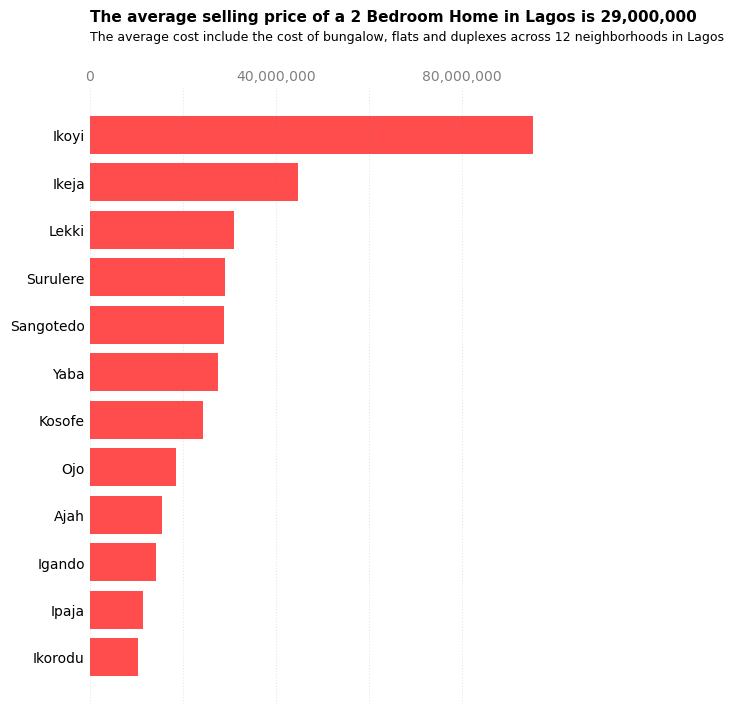

In [25]:
#setting the threshold for the analysis
threshold = 10
#creating a result of the unique values in the neighborhood and the number of times they appear
count_2 = two_bedroom['neighborhood'].value_counts()
#filtering the count_2 variable to include neighborhoods that are greater than or equal to the threshold
count_2 = count_2[count_2 >= threshold].index
#using the result of the count_2 variable to filter the neighborhood ith two bedroom to only include neighborhoods that appear 10 or more time 
filtered_two_bedroom = two_bedroom[two_bedroom['neighborhood'].isin(count_2)]
mean_two_bedroom = filtered_two_bedroom.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_two_bedroom['neighborhood'], mean_two_bedroom['price'], color='red', alpha=0.7)
ax.spines[['left', 'right','top','bottom']].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(['0', '', '40,000,000', '', '80,000,000'], alpha=0.5)
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
ax.text(100000, 13.4, 'The average selling price of a 2 Bedroom Home in Lagos is 29,000,000',fontsize=11, weight='bold')
ax.text(100000, 13, 'The average cost include the cost of bungalow, flats and duplexes across 12 neighborhoods in Lagos', fontsize=9)


## Visualizing average price for a 3 bedroom Home

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\975007243.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '40,000,000', '', '80,000,000', '', '120,000,000', '','160,000,000'], alpha=0.5)


Text(100000, 27.5, 'The average cost include the cost of bungalow, flats and duplexes across 25 neighborhoods in Lagos')

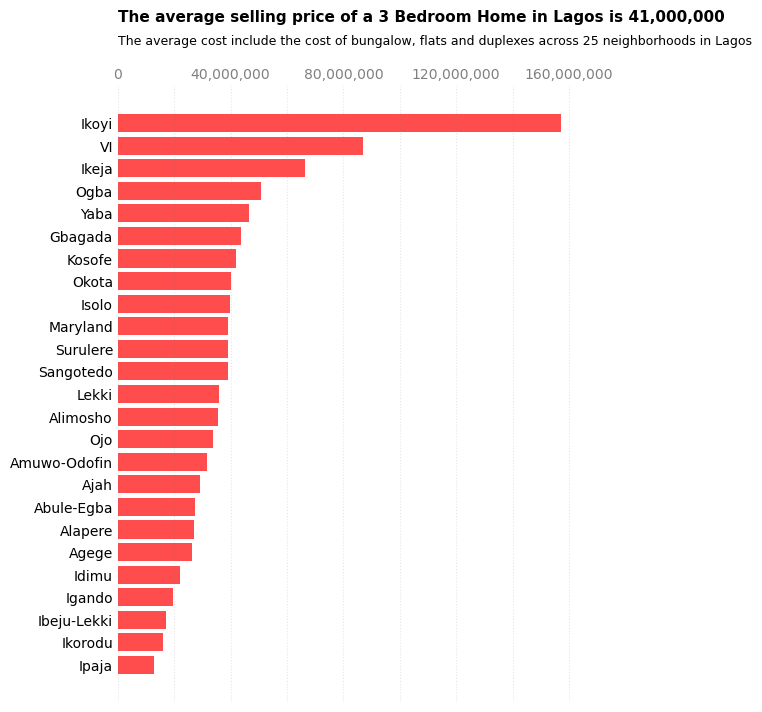

In [32]:
count_3 = three_bedroom['neighborhood'].value_counts()
count_3 = count_3[count_3 >= threshold].index
filtered_three_bedroom = three_bedroom[three_bedroom['neighborhood'].isin(count_3)]
mean_three_bedroom = filtered_three_bedroom.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_three_bedroom['neighborhood'], mean_three_bedroom['price'], color='red', alpha=0.7)
#removing all the lines in the visualization
ax.spines[['left', 'right','top','bottom']].set_visible(False)
#removing the ticks in the x and y axis
plt.tick_params(axis='both', which='both', length=0)
#changing the position of the x axis label to the top
ax.xaxis.set_ticks_position('top')
#rewriting the values of the x axis label
ax.set_xticklabels(['0', '', '40,000,000', '', '80,000,000', '', '120,000,000', '','160,000,000'], alpha=0.5)
#adding grid to the visualization to help estimate the figures of the x axis
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
#adding text to the visualization
ax.text(100000, 28.5, 'The average selling price of a 3 Bedroom Home in Lagos is 41,000,000',fontsize=11, weight='bold')
ax.text(100000, 27.5, 'The average cost include the cost of bungalow, flats and duplexes across 25 neighborhoods in Lagos', fontsize=9)


## Visualizing average price for a 4 bedroom Home

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\214756912.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', '40,000,000', '', '', '100,000,000', '', '', '160,000,000'], alpha=0.5)


Text(100000, 24.5, 'The average cost include the cost of bungalow, flats and duplexes across 22 neighborhoods in Lagos')

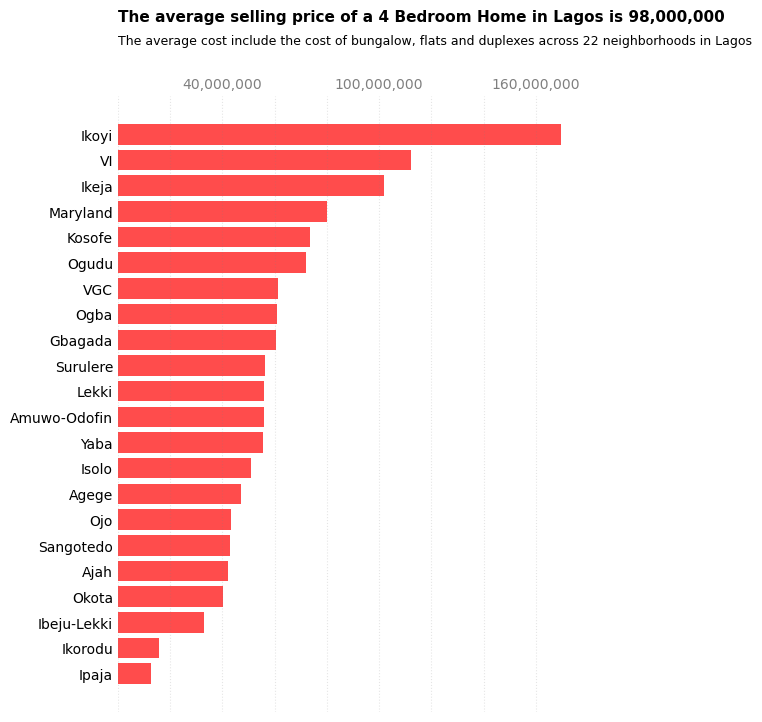

In [12]:
count_4 = four_bedroom['neighborhood'].value_counts()
count_4 = count_4[count_4 >= threshold].index
filtered_four_bedroom = four_bedroom[four_bedroom['neighborhood'].isin(count_4)]
mean_four_bedroom = filtered_four_bedroom.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_four_bedroom['neighborhood'], mean_four_bedroom['price'], color='red', alpha=0.7)
ax.spines[['left', 'right','top','bottom']].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(['', '', '40,000,000', '', '', '100,000,000', '', '', '160,000,000'], alpha=0.5)
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
ax.text(100000, 25.4, 'The average selling price of a 4 Bedroom Home in Lagos is 98,000,000',fontsize=11, weight='bold')
ax.text(100000, 24.5, 'The average cost include the cost of bungalow, flats and duplexes across 22 neighborhoods in Lagos', fontsize=9)

## Visualizing average price for a 5 bedroom Home

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\4117077580.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '100,000,000', '', '200,000,000', '', '300,000,000'], alpha=0.5)


Text(100000, 18.5, 'The average cost include the cost of bungalow, flats and duplexes across 17 neighborhoods in Lagos')

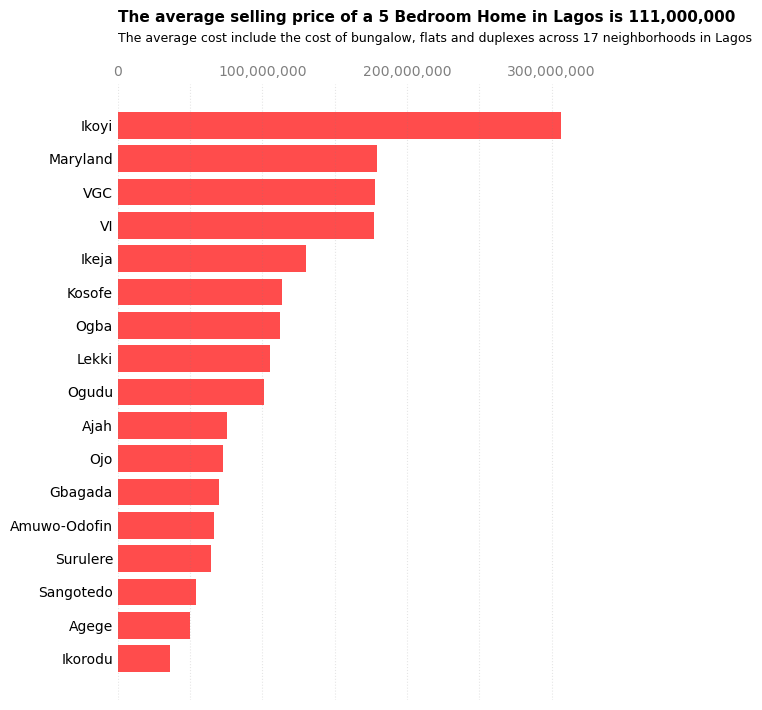

In [13]:
count_5 = five_bedroom['neighborhood'].value_counts()
count_5 = count_5[count_5 >= threshold].index
filtered_five_bedroom = five_bedroom[five_bedroom['neighborhood'].isin(count_5)]
mean_five_bedroom = filtered_five_bedroom.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_five_bedroom['neighborhood'], mean_five_bedroom['price'], color='red', alpha=0.7)
ax.spines[['left', 'right','top','bottom']].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(['0', '', '100,000,000', '', '200,000,000', '', '300,000,000'], alpha=0.5)
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
ax.text(100000, 19.1, 'The average selling price of a 5 Bedroom Home in Lagos is 111,000,000',fontsize=11, weight='bold')
ax.text(100000, 18.5, 'The average cost include the cost of bungalow, flats and duplexes across 17 neighborhoods in Lagos', fontsize=9)


## Visualizing average price for a 6 bedroom Home

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\1836878905.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '200,000,000', '', '400,000,000'], alpha=0.5)


Text(100000, 6.1, 'The average cost include the cost of bungalow, flats and duplexes across 6 neighborhoods in Lagos')

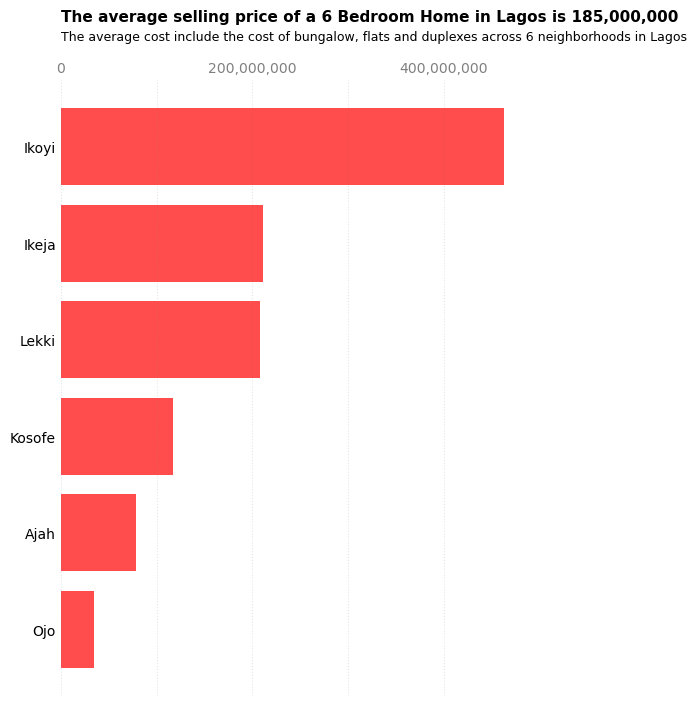

In [14]:
count_6 = six_bedroom['neighborhood'].value_counts()
count_6 = count_6[count_6 >= threshold].index
filtered_six_bedroom = six_bedroom[six_bedroom['neighborhood'].isin(count_6)]
mean_six_bedroom = filtered_six_bedroom.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_six_bedroom['neighborhood'], mean_six_bedroom['price'], color='red', alpha=0.7)
ax.spines[['left', 'right','top','bottom']].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(['0', '', '200,000,000', '', '400,000,000'], alpha=0.5)
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
ax.text(100000, 6.3, 'The average selling price of a 6 Bedroom Home in Lagos is 185,000,000',fontsize=11, weight='bold')
ax.text(100000, 6.1, 'The average cost include the cost of bungalow, flats and duplexes across 6 neighborhoods in Lagos', fontsize=9)

C:\Users\USER\AppData\Local\Temp\ipykernel_13788\2828120566.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', '50,000,000', '', '', '125,000,000', '', '', '200,000,000'], alpha=0.5)


Text(100000, 19.5, 'The average cost of land across 18 neighborhoods in Lagos')

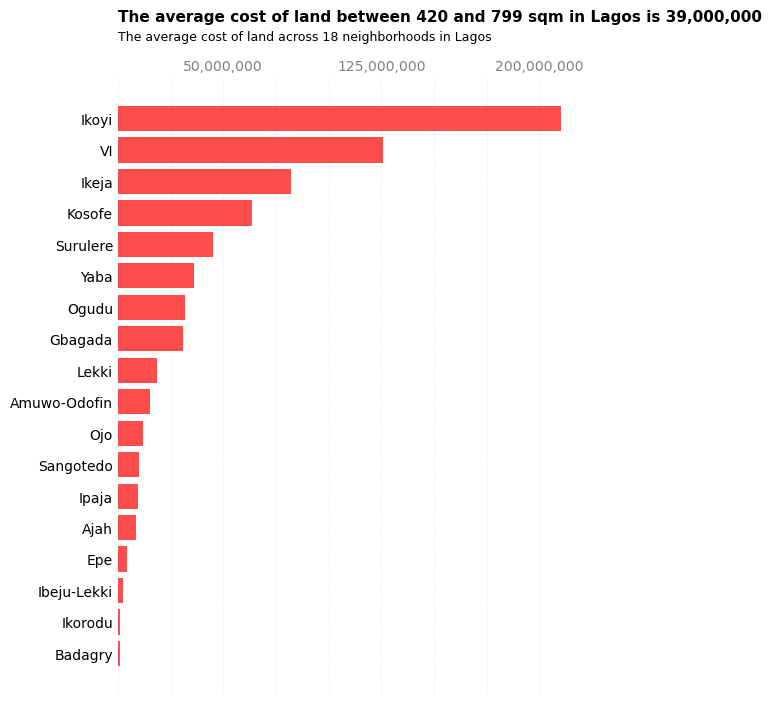

In [15]:
threshold_2 = 9
count_7 = land['neighborhood'].value_counts()
count_7 = count_7[count_7 >= threshold].index
filtered_land = land[land['neighborhood'].isin(count_7)]
mean_land = filtered_land.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_land['neighborhood'], mean_land['price'], color='red', alpha=0.7)
ax.spines[['left', 'right','top','bottom']].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(['', '', '50,000,000', '', '', '125,000,000', '', '', '200,000,000'], alpha=0.5)
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
ax.text(100000, 20.1, 'The average cost of land between 420 and 799 sqm in Lagos is 39,000,000',fontsize=11, weight='bold')
ax.text(100000, 19.5, 'The average cost of land across 18 neighborhoods in Lagos', fontsize=9)


C:\Users\USER\AppData\Local\Temp\ipykernel_13788\3601135352.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '', '100,000,000', '', '200,000,000', '', '300,000,000'], alpha=0.5)


Text(100000, 7.2, 'The average cost of land across 7 neighborhoods in Lagos')

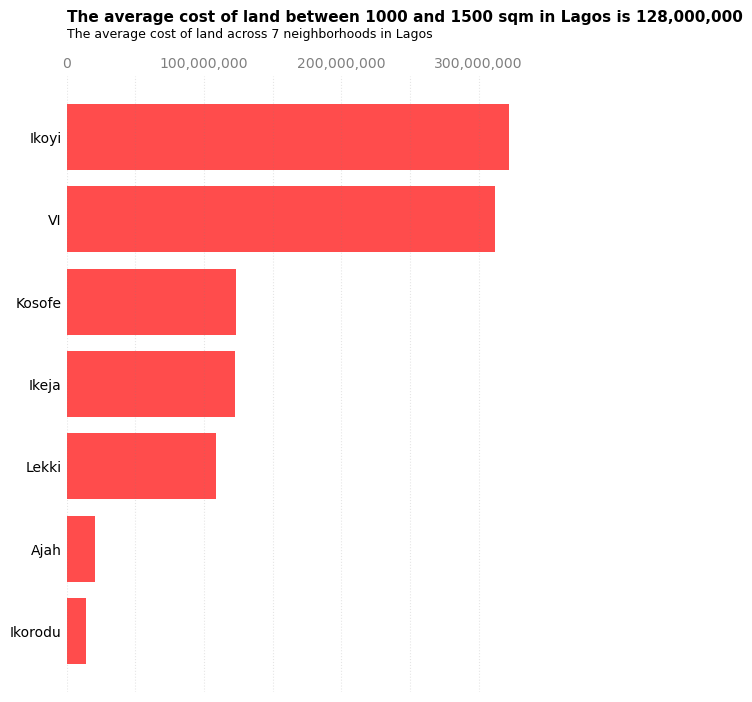

In [16]:
count_8 = land_2['neighborhood'].value_counts()
count_8 = count_8[count_8 >= threshold_2].index
filtered_land_2 = land_2[land_2['neighborhood'].isin(count_8)]
mean_land_2 = filtered_land_2.groupby('neighborhood')['price'].apply(outlier_mean).sort_values().reset_index()

fig, ax = plt.subplots(figsize=(6, 8))
plt.barh(mean_land_2['neighborhood'], mean_land_2['price'], color='red', alpha=0.7)
ax.spines[['left', 'right','top','bottom']].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(['0', '', '100,000,000', '', '200,000,000', '', '300,000,000'], alpha=0.5)
ax.grid(True, linestyle='dotted', which='major', axis='x', color='grey', alpha=0.2)
ax.text(100000, 7.4, 'The average cost of land between 1000 and 1500 sqm in Lagos is 128,000,000',fontsize=11, weight='bold')
ax.text(100000, 7.2, 'The average cost of land across 7 neighborhoods in Lagos', fontsize=9)

## Using the standard deviation to calculate a fair price range for each Neighborhood
The benchmark used for identifying a high price is the price that falls outside one standard deviation (z-score). The average column in each category will display the mean of the prices within each neighborhood with the outliers removed while the high column represents the maximum price considered within a normal price range. The disadvantage of this technique is that it works best on normally distributed data. If the data is skewed it could under/overestimate what a high price should be.

## Land between 420 and 799 SQM

In [41]:
def outlier_std(data):
    #calculating the first quartile which is the 25th percentile
    Q1 = data.quantile(0.25)
    #calculating the first quartile which is the 75th percentile
    Q3 = data.quantile(0.75)
    #calculating the iqr
    IQR = Q3 -Q1
    #calculating the lower and upper limit of the data
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    #filtering the dataset to include with the limits
    updated_data = data[(data >= lower) & (data <= upper)]
    #return the standard deviation of the data after the outliers have been removed
    return data[(data >= lower) & (data <= upper)].std(ddof=1)

#changing the number from scientific notation to monetary values (number separated by comma)
pd.options.display.float_format = '{:,.0f}'.format
#finding the mean and standard deviation of each neighborhood
range_land = filtered_land.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
#adding the mean and standard deviation to get the high price value
range_land['high'] = round(range_land['price']['outlier_mean'] + range_land['price']['outlier_std'], -4)
#dropping the outlier_std column as it is no longer needed
range_land.drop(('price', 'outlier_std'), axis=1, inplace=True)
#calculating the average
range_land['Average'] = round(range_land['price']['outlier_mean'], -4)
#dropping the outlier_mean column to avoid duplication
range_land.drop(range_land.columns[0], axis=1, inplace=True)
range_land['High'] = range_land['high']
range_land.drop('high', axis=1, inplace=True)
#sorting the table by the average column
range_land.sort_values(by='Average', inplace=True)
range_land

,Average,High
,,
neighborhood,,
Badagry,"1,080,000","1,440,000"
Ikorodu,"1,200,000","1,860,000"
Ibeju-Lekki,"2,620,000","4,370,000"
Epe,"4,270,000","9,740,000"
Ajah,"8,790,000","12,770,000"
Ipaja,"9,710,000","12,020,000"
Sangotedo,"9,790,000","13,430,000"
Ojo,"12,150,000","24,340,000"


## Land between 1000 and 1500 SQM

In [39]:
range_land_2 = filtered_land_2.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
range_land_2['high'] = round(range_land_2['price']['outlier_mean'] + range_land_2['price']['outlier_std'], -4)
range_land_2.drop(('price', 'outlier_std'), axis=1, inplace=True)
range_land_2['Average'] = round(range_land_2['price']['outlier_mean'], -4)
range_land_2.drop(range_land_2.columns[0], axis=1, inplace=True)
range_land_2['High'] = range_land_2['high']
range_land_2.drop('high', axis=1, inplace=True)
range_land_2.sort_values(by='Average', inplace=True)
range_land_2

,Average,High
,,
neighborhood,,
Ikorodu,"14,430,000","19,390,000"
Ajah,"20,420,000","27,000,000"
Lekki,"109,120,000","173,190,000"
Ikeja,"122,600,000","208,230,000"
Kosofe,"123,330,000","159,130,000"
VI,"311,820,000","455,400,000"
Ikoyi,"322,500,000","358,460,000"


## 2 Bedroom

In [19]:
filtered_two_bedroom = filtered_two_bedroom.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
filtered_two_bedroom['high'] = round(filtered_two_bedroom['price']['outlier_mean'] + filtered_two_bedroom['price']['outlier_std'], -4)
filtered_two_bedroom.drop(('price', 'outlier_std'), axis=1, inplace=True)
filtered_two_bedroom['Average'] = round(filtered_two_bedroom['price']['outlier_mean'], -4)
filtered_two_bedroom.drop(filtered_two_bedroom.columns[0], axis=1, inplace=True)
filtered_two_bedroom['High'] = filtered_two_bedroom['high']
filtered_two_bedroom.drop('high', axis=1, inplace=True)
filtered_two_bedroom.sort_values(by='Average', inplace=True)
filtered_two_bedroom

,Average,High
,,
neighborhood,,
Ikorodu,"10,340,000","15,560,000"
Ipaja,"11,550,000","16,440,000"
Igando,"14,250,000","21,950,000"
Ajah,"15,550,000","23,330,000"
Ojo,"18,570,000","29,070,000"
Kosofe,"24,360,000","29,970,000"
Yaba,"27,500,000","39,270,000"
Sangotedo,"28,780,000","57,070,000"


## 3 Bedroom

In [20]:
filtered_three_bedroom = filtered_three_bedroom.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
filtered_three_bedroom['high'] = round(filtered_three_bedroom['price']['outlier_mean'] + filtered_three_bedroom['price']['outlier_std'], -4)
filtered_three_bedroom.drop(('price', 'outlier_std'), axis=1, inplace=True)
filtered_three_bedroom['Average'] = round(filtered_three_bedroom['price']['outlier_mean'], -4)
filtered_three_bedroom.drop(filtered_three_bedroom.columns[0], axis=1, inplace=True)
filtered_three_bedroom['High'] = filtered_three_bedroom['high']
filtered_three_bedroom.drop('high', axis=1, inplace=True)
filtered_three_bedroom.sort_values(by='Average', inplace=True)
filtered_three_bedroom

,Average,High
,,
neighborhood,,
Ipaja,"12,720,000","18,580,000"
Ikorodu,"16,090,000","28,570,000"
Ibeju-Lekki,"16,970,000","21,730,000"
Igando,"19,420,000","26,360,000"
Idimu,"21,950,000","30,820,000"
Agege,"26,350,000","39,360,000"
Alapere,"26,850,000","39,410,000"
Abule-Egba,"27,480,000","48,050,000"


## 4 Bedroom

In [21]:
filtered_four_bedroom = filtered_four_bedroom.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
filtered_four_bedroom['high'] = round(filtered_four_bedroom['price']['outlier_mean'] + filtered_four_bedroom['price']['outlier_std'], -4)
filtered_four_bedroom.drop(('price', 'outlier_std'), axis=1, inplace=True)
filtered_four_bedroom['Average'] = round(filtered_four_bedroom['price']['outlier_mean'], -4)
filtered_four_bedroom.drop(filtered_four_bedroom.columns[0], axis=1, inplace=True)
filtered_four_bedroom['High'] = filtered_four_bedroom['high']
filtered_four_bedroom.drop('high', axis=1, inplace=True)
filtered_four_bedroom.sort_values(by='Average', inplace=True)
filtered_four_bedroom

,Average,High
,,
neighborhood,,
Ipaja,"12,820,000","18,450,000"
Ikorodu,"15,580,000","25,350,000"
Ibeju-Lekki,"33,140,000","36,220,000"
Okota,"40,250,000","53,010,000"
Ajah,"42,020,000","53,290,000"
Sangotedo,"42,860,000","58,280,000"
Ojo,"43,280,000","57,260,000"
Agege,"46,940,000","66,010,000"


## 5 Bedroom

In [22]:
filtered_five_bedroom = filtered_five_bedroom.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
filtered_five_bedroom['high'] = round(filtered_five_bedroom['price']['outlier_mean'] + filtered_five_bedroom['price']['outlier_std'], -4)
filtered_five_bedroom.drop(('price', 'outlier_std'), axis=1, inplace=True)
filtered_five_bedroom['Average'] = round(filtered_five_bedroom['price']['outlier_mean'], -4)
filtered_five_bedroom.drop(filtered_five_bedroom.columns[0], axis=1, inplace=True)
filtered_five_bedroom['High'] = filtered_five_bedroom['high']
filtered_five_bedroom.drop('high', axis=1, inplace=True)
filtered_five_bedroom.sort_values(by='Average', inplace=True)
filtered_five_bedroom

,Average,High
,,
neighborhood,,
Ikorodu,"36,060,000","47,800,000"
Agege,"50,000,000","65,600,000"
Sangotedo,"54,290,000","72,700,000"
Surulere,"64,750,000","86,050,000"
Amuwo-Odofin,"66,540,000","96,030,000"
Gbagada,"70,000,000","87,220,000"
Ojo,"73,040,000","104,990,000"
Ajah,"75,590,000","118,570,000"


## 6 Bedroom

In [23]:
filtered_six_bedroom = filtered_six_bedroom.groupby('neighborhood').agg({'price': [outlier_mean, outlier_std]})
filtered_six_bedroom['high'] = round(filtered_six_bedroom['price']['outlier_mean'] + filtered_six_bedroom['price']['outlier_std'], -4)
filtered_six_bedroom.drop(('price', 'outlier_std'), axis=1, inplace=True)
filtered_six_bedroom['Average'] = round(filtered_six_bedroom['price']['outlier_mean'], -4)
filtered_six_bedroom.drop(filtered_six_bedroom.columns[0], axis=1, inplace=True)
filtered_six_bedroom['High'] = filtered_six_bedroom['high']
filtered_six_bedroom.drop('high', axis=1, inplace=True)
filtered_six_bedroom.sort_values(by='Average', inplace=True)
filtered_six_bedroom

,Average,High
,,
neighborhood,,
Ojo,"34,860,000","55,140,000"
Ajah,"78,000,000","116,740,000"
Kosofe,"117,270,000","165,970,000"
Lekki,"208,370,000","350,850,000"
Ikeja,"211,320,000","338,690,000"
Ikoyi,"462,500,000","497,860,000"


## Conclusion

Based on the analysis, it's evident that Ikoyi stands out as the most expensive area for property investment, whereas areas like Ikorodu and Ipaja are among the more affordable options.

Interestingly, Lekki, despite being known as one of Lagos's affluent neighborhoods, falls either below or within the overall average property price range for Lagos.

For those seeking investment opportunities, neighborhoods like Kosofe and Ogudu are worth considering, as they align with the average property prices in Lagos, making them suitable choices for the average investor.

## Recommendation

As previously mentioned in the project's introduction, it's essential to acknowledge that the dataset used in this analysis is somewhat outdated, dating back to one year ago. To enhance the accuracy of this analysis, obtaining and examining more recent data would be prudent, allowing us to account for any developments since the dataset's collection.

Given that this analysis relies on older data, it is recommended to utilize the findings to understand property prices from 2022 up to the point at which this report is being read.

## Limitations

In this report, it's important to address several key limitations:

**Data Source and Credibility**: The data used for this analysis was obtained from Kaggle, posted by a user who claimed to have gathered it through web scraping. As the data was not collected by the author, questions regarding its credibility and accuracy may arise.

**Sample Size Variation**: In some neighborhoods, the analysis may not accurately reflect reality due to the limited amount of data available for those areas. Larger sample sizes tend to provide a closer representation of the overall population, and the results for these neighborhoods may not be as reliable.

**Limited Neighborhood Representation**: Not every neighborhood was included in the analysis due to a minimum threshold of ten data points being set for inclusion. This criterion was employed to ensure more accurate results, but it may result in certain neighborhoods being excluded from the analysis.

**Outlier Removal**: To mitigate the impact of outliers on the analysis, they were removed. However, this process could potentially lead to underestimation or overestimation of the analysis results.

By addressing these limitations, readers can better understand the potential constraints of the analysis and interpret the results within the context of these considerations.